In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

### Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(y_train[0])

9


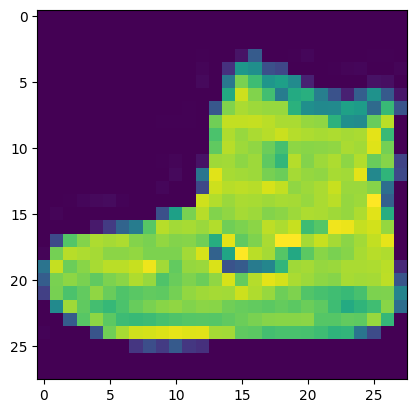

In [6]:
plt.imshow(X_train[0])
plt.show()

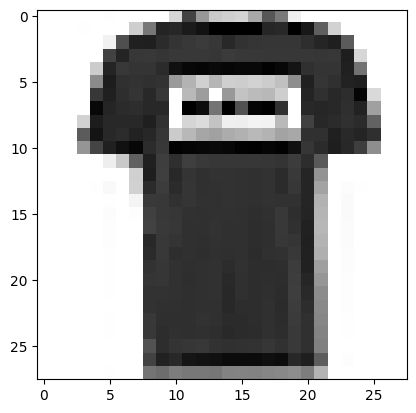

In [7]:
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show();

### Pre-Processing

In [8]:
label_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [10]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### SparseCategoricalCrossentropy
$$
L = - \sum_{i=0}^{N-1} y_{i} \cdot log(p_{i})
$$
Where N is number of labels

### Network (ANN) Architecture

In [ ]:
input_shape = (28, 28, 1)
model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(units=512, activation="relu"),
    Dense(units=256, activation="relu"),
    Dense(units=len(label_names), activation="softmax")
], name="my_model")

In [13]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8200 - loss: 0.4869 - val_accuracy: 0.8559 - val_loss: 0.3891
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8692 - loss: 0.3543 - val_accuracy: 0.8732 - val_loss: 0.3438
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8812 - loss: 0.3160 - val_accuracy: 0.8585 - val_loss: 0.3695
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8897 - loss: 0.2906 - val_accuracy: 0.8753 - val_loss: 0.3367
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8973 - loss: 0.2688 - val_accuracy: 0.8798 - val_loss: 0.3220
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9045 - loss: 0.2520 - val_accuracy: 0.8779 - val_loss: 0.3304
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9104 - loss: 0.2362 - val_accuracy: 0.8807 - val_loss: 0.3313
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9158 - loss: 0.2210 - val_accuracy: 0

In [15]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [16]:
train_acc, val_acc = history_dict["accuracy"], history_dict["val_accuracy"]
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]

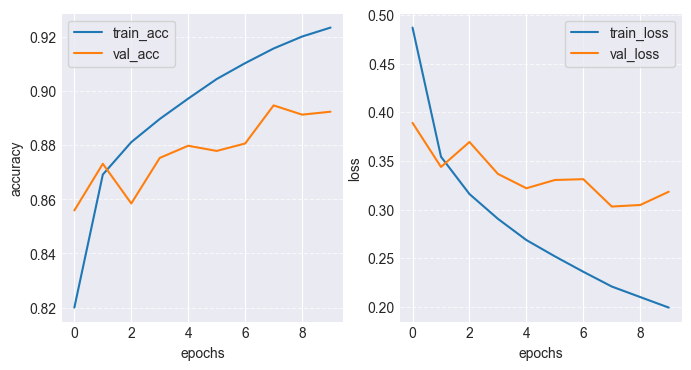

In [17]:
plt.style.use("seaborn-v0_8-darkgrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(train_acc, label="train_acc")
axes[0].plot(val_acc, label="val_acc")
axes[0].set_xlabel("epochs")
axes[0].set_ylabel("accuracy")
axes[0].legend(loc="best", frameon=True)
axes[0].grid(True, linestyle="--", axis="y", alpha=0.7)

axes[1].plot(train_loss, label="train_loss")
axes[1].plot(val_loss, label="val_loss")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("loss")
axes[1].legend(loc="best", frameon=True)
axes[1].grid(True, linestyle="--", axis="y", alpha=0.7)


plt.show();

### Model Evaluation

In [18]:
score = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8874 - loss: 0.3370


In [19]:
def random_prediction(X_data, y_data):
    nrows, ncols = 2, 4
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4))
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]
            random_index = np.random.randint(0, len(X_data))
            ax.imshow(X_data[random_index], cmap="gray")
            ax.set_xticks([])
            ax.set_yticks([])
            true_label = label_names[y_data[random_index]];
            true_label_str = f"True: {true_label}"
            prediction = model.predict(X_data[[random_index]])
            predicted_index = np.argmax(prediction)
            prediction_label = label_names[predicted_index]
            color = "red" if prediction_label !=  true_label else "green"
            predicted_label_str = f"\nPredicted: {prediction_label}"
            ax.set_xlabel(true_label_str + predicted_label_str, color=color)
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


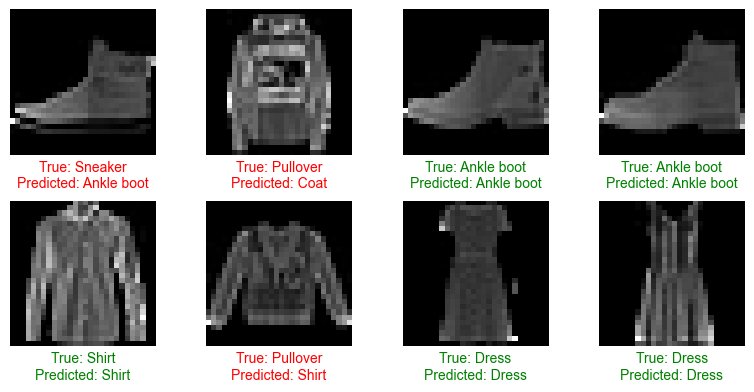

In [20]:
random_prediction(X_test, y_test)